In [37]:
#importing dependencies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [39]:
!pip install xgboost


In [40]:
#importing dataset
df=pd.read_csv(r"F:\My projects\ongoing\customerData_500k.csv")
df.head
print(df)


        Age   AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
0        37   57722.572411                 19            5.908826   
1        63   21328.925876                 10            6.970749   
2        60  150537.742465                 19           35.004954   
3        19   63508.762549                 10           14.818000   
4        54  100399.558368                 19           55.925462   
...     ...            ...                ...                 ...   
499995   56  113252.441232                 16           26.327274   
499996   40   59758.016150                 13            7.124139   
499997   50   64968.696662                 10           28.440505   
499998   38  150832.320683                  8           50.161579   
499999   75  103195.115295                  4           23.528559   

        CustomerTenureYears  LastPurchaseDaysAgo  Gender ProductCategory  \
0                  1.093430                   11    Male       Furniture   
1                  

<Axes: >

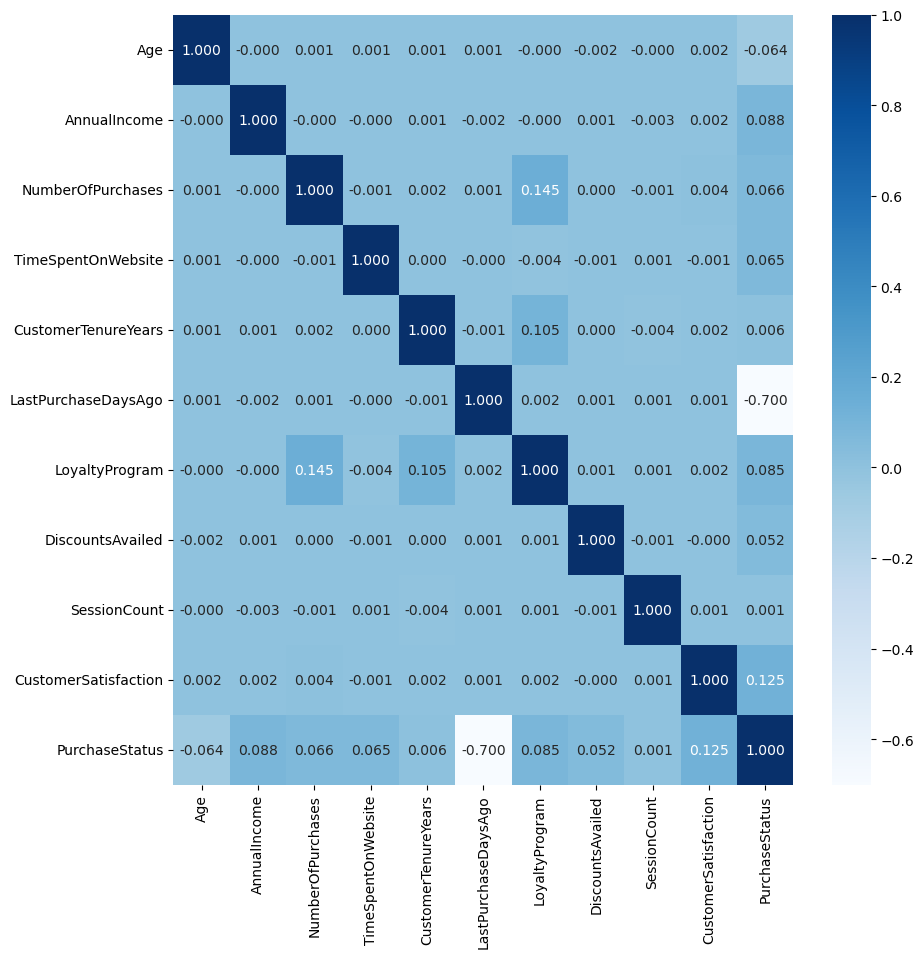

In [41]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.3f',cmap='Blues')

In [42]:
#Summary of the data
df.describe()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,43.941044,85071.804966,11.387584,30.594395,2.163483,60.191362,0.501110,3.154496,2.351750,3.219764,0.418354
std,15.756232,39586.271859,6.000702,17.585290,2.197354,54.886826,0.499999,1.879333,1.485597,0.826482,0.493289
min,15.000000,11966.385655,-1.000000,-3.804161,-0.418429,-11.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,51998.815726,6.000000,15.843041,0.592285,16.000000,0.000000,2.000000,1.000000,3.000000,0.000000
50%,44.000000,83748.351846,12.000000,30.763164,1.466097,31.000000,1.000000,3.000000,2.000000,3.000000,0.000000
75%,57.000000,116554.694607,16.000000,45.012866,3.009516,105.000000,1.000000,5.000000,3.000000,4.000000,1.000000
max,81.000000,204178.294436,28.000000,78.364251,15.346356,189.000000,1.000000,10.000000,12.000000,5.000000,1.000000


In [43]:
df.isnull().values.any()


np.False_

In [44]:
print(df['Gender'].unique())
print(df['ProductCategory'].unique())
print(df['ReferralSource'].unique())
print(df['CustomerSegment'].unique())
print(df['PreferredDevice'].unique())
print(df['Region'].unique())

['Male' 'Female']
['Furniture' 'Electronics' 'Kitchen' 'Fashion' 'Groceries']
['Paid Ads' 'Organic' 'Referral' 'Email' 'Social']
['Regular' 'VIP' 'Premium']
['Desktop' 'Mobile' 'Tablet']
['South' 'East' 'West' 'North']


In [45]:
df.isnull().sum()
df['Gender'].value_counts()

Gender
Male      252560
Female    247440
Name: count, dtype: int64

In [46]:
df['PurchaseStatus'].value_counts()

PurchaseStatus
0    290823
1    209177
Name: count, dtype: int64

In [47]:
df.columns

Index(['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite',
       'CustomerTenureYears', 'LastPurchaseDaysAgo', 'Gender',
       'ProductCategory', 'PreferredDevice', 'Region', 'ReferralSource',
       'CustomerSegment', 'LoyaltyProgram', 'DiscountsAvailed', 'SessionCount',
       'CustomerSatisfaction', 'PurchaseStatus'],
      dtype='object')

In [48]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

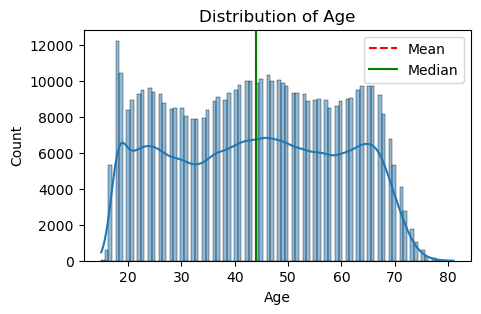

In [49]:
plot_histogram(df,'Age')

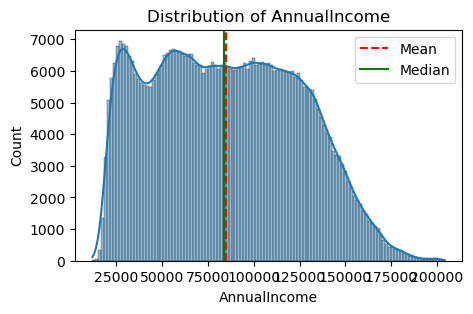

In [50]:
plot_histogram(df,'AnnualIncome')

In [51]:
def plot_boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f'Distribution of {column_name}')
    plt.ylabel(column_name)
    plt.show
    

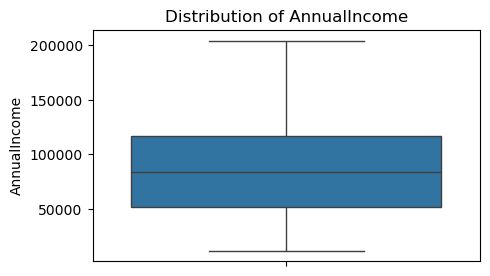

In [52]:
plot_boxplot(df,'AnnualIncome')

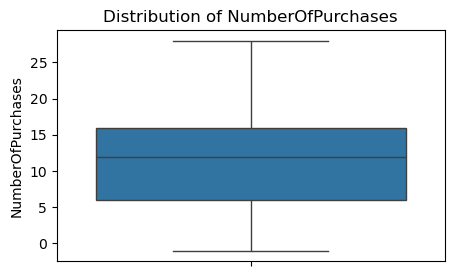

In [53]:
plot_boxplot(df,'NumberOfPurchases')

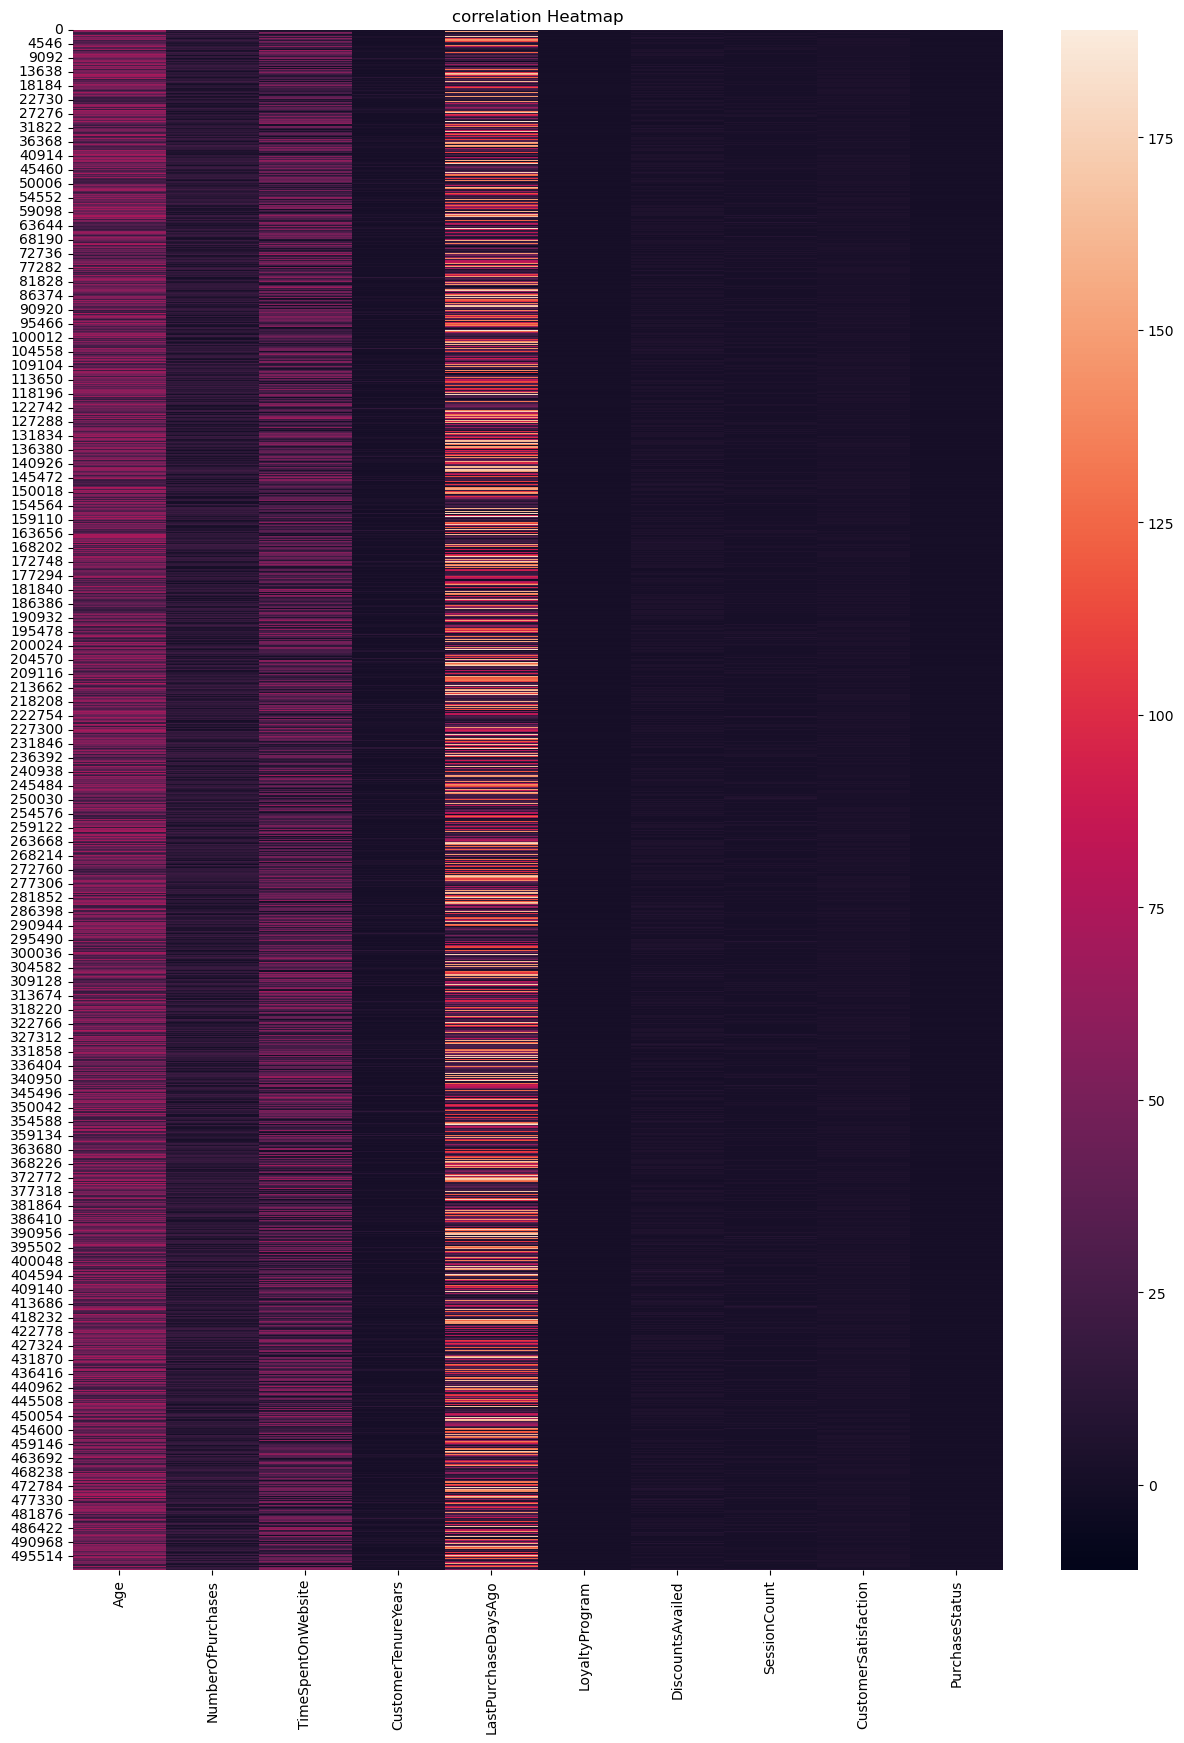

In [54]:
#correlation matrix .heatmap
plt.figure(figsize=(15,20))
vor = df.corr(numeric_only=True)
sns.heatmap(df[["Age",		"NumberOfPurchases"	,"TimeSpentOnWebsite",	"CustomerTenureYears",	"LastPurchaseDaysAgo",	"LoyaltyProgram",	"DiscountsAvailed"	,"SessionCount"	,"CustomerSatisfaction",	"PurchaseStatus"]])
plt.title("correlation Heatmap")
plt.show()

<Axes: >

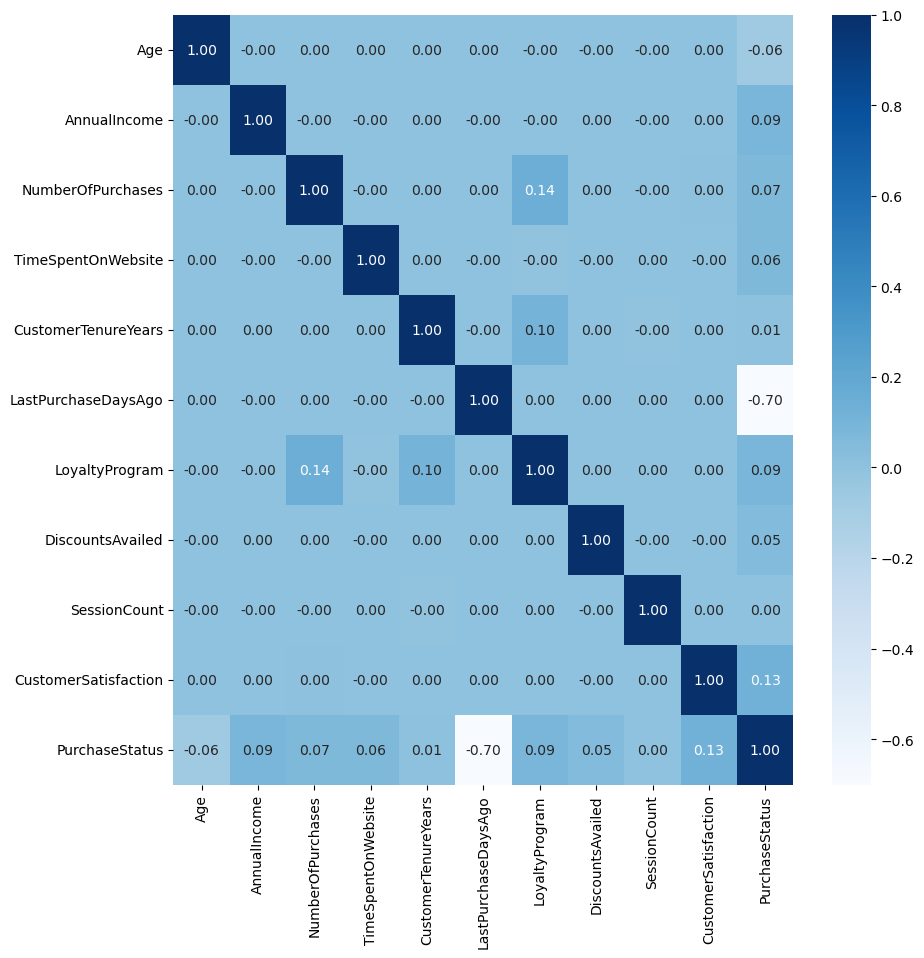

In [55]:
vor = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(vor,cbar=True,annot=True,fmt='.2f',cmap='Blues')


In [56]:
df.columns

Index(['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite',
       'CustomerTenureYears', 'LastPurchaseDaysAgo', 'Gender',
       'ProductCategory', 'PreferredDevice', 'Region', 'ReferralSource',
       'CustomerSegment', 'LoyaltyProgram', 'DiscountsAvailed', 'SessionCount',
       'CustomerSatisfaction', 'PurchaseStatus'],
      dtype='object')

In [57]:
df.info

<bound method DataFrame.info of         Age   AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
0        37   57722.572411                 19            5.908826   
1        63   21328.925876                 10            6.970749   
2        60  150537.742465                 19           35.004954   
3        19   63508.762549                 10           14.818000   
4        54  100399.558368                 19           55.925462   
...     ...            ...                ...                 ...   
499995   56  113252.441232                 16           26.327274   
499996   40   59758.016150                 13            7.124139   
499997   50   64968.696662                 10           28.440505   
499998   38  150832.320683                  8           50.161579   
499999   75  103195.115295                  4           23.528559   

        CustomerTenureYears  LastPurchaseDaysAgo  Gender ProductCategory  \
0                  1.093430                   11    Male       

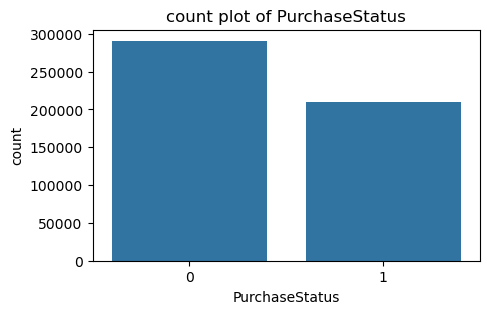

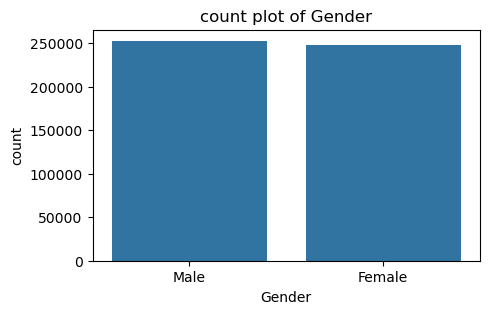

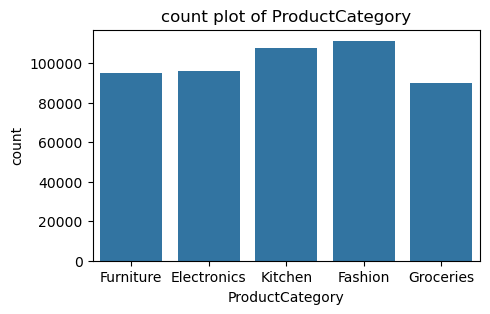

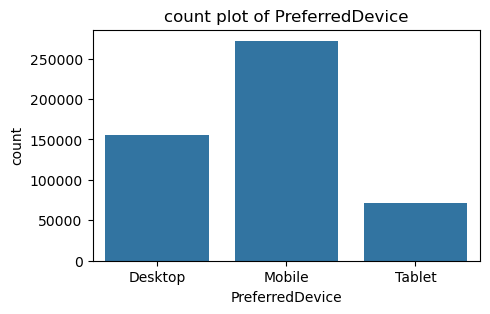

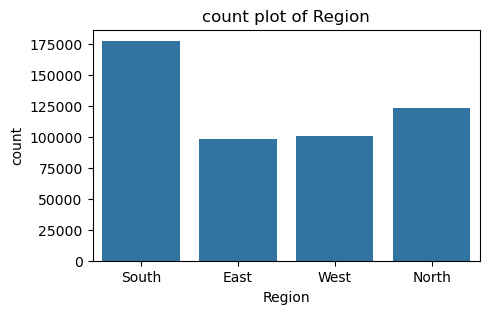

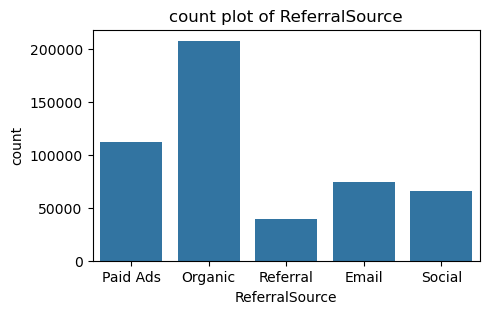

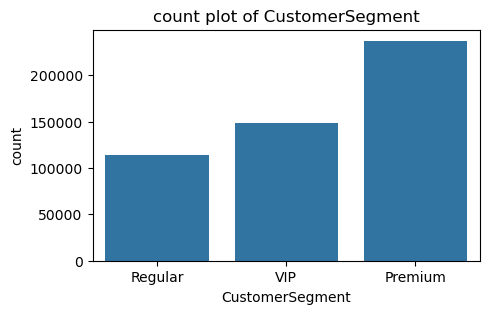

In [58]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=["PurchaseStatus"]+object_cols
object_cols
for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col}")
    plt.show()

In [59]:
df.head(3)

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus
0,37,57722.572411,19,5.908826,1.093430,11,Male,Furniture,Desktop,South,Paid Ads,Regular,1,5,3,2,1
1,63,21328.925876,10,6.970749,0.649246,20,Female,Furniture,Mobile,East,Organic,VIP,0,4,2,3,0
2,60,150537.742465,19,35.004954,3.858211,25,Male,Electronics,Desktop,South,Organic,VIP,1,2,5,2,0


chategariacal variable change

In [60]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols

['Gender',
 'ProductCategory',
 'PreferredDevice',
 'Region',
 'ReferralSource',
 'CustomerSegment']

In [61]:
from sklearn.preprocessing import LabelEncoder
import pickle

# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_cols:
    label_encoder = LabelEncoder()     
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [62]:
encoders

{'Gender': LabelEncoder(),
 'ProductCategory': LabelEncoder(),
 'PreferredDevice': LabelEncoder(),
 'Region': LabelEncoder(),
 'ReferralSource': LabelEncoder(),
 'CustomerSegment': LabelEncoder()}

In [63]:
df.head(3)

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus
0,37,57722.572411,19,5.908826,1.093430,11,1,2,0,2,2,1,1,5,3,2,1
1,63,21328.925876,10,6.970749,0.649246,20,0,2,1,0,1,2,0,4,2,3,0
2,60,150537.742465,19,35.004954,3.858211,25,1,0,0,2,1,2,1,2,5,2,0


In [64]:
#target variable and feature variable 
x = df.drop(columns='PurchaseStatus',axis =1)
y = df['PurchaseStatus']

In [65]:
print(x)

        Age   AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
0        37   57722.572411                 19            5.908826   
1        63   21328.925876                 10            6.970749   
2        60  150537.742465                 19           35.004954   
3        19   63508.762549                 10           14.818000   
4        54  100399.558368                 19           55.925462   
...     ...            ...                ...                 ...   
499995   56  113252.441232                 16           26.327274   
499996   40   59758.016150                 13            7.124139   
499997   50   64968.696662                 10           28.440505   
499998   38  150832.320683                  8           50.161579   
499999   75  103195.115295                  4           23.528559   

        CustomerTenureYears  LastPurchaseDaysAgo  Gender  ProductCategory  \
0                  1.093430                   11       1                2   
1                

In [66]:
#Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
print(y_train.shape)

(400000,)


In [68]:
print(y_train.shape)

(400000,)


In [69]:
smote=SMOTE(random_state=42)

In [70]:
#synthetic minority oversampling technique(SMOTE)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [71]:
print(f'x_train_smote{x_train_smote}')


x_train_smote        Age   AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
0        46   44765.583097                 13            5.166103   
1        39   69231.691590                  2           55.814966   
2        49   59479.831357                 14           23.897318   
3        22  111242.540856                 17           16.369913   
4        44  123426.784494                  6           32.585769   
...     ...            ...                ...                 ...   
465097   48  114006.240348                 13           52.593796   
465098   57  127829.669761                 12            5.606768   
465099   69   43984.180280                 19           36.075018   
465100   54  100751.259234                 13           14.676112   
465101   46   55172.488307                 11           51.431690   

        CustomerTenureYears  LastPurchaseDaysAgo  Gender  ProductCategory  \
0                  1.579501                   32       0                3   
1   

In [72]:
print(f"x_train{x_train}")

x_train        Age   AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
269056   46   44765.583097                 13            5.166103   
499174   39   69231.691590                  2           55.814966   
85143    49   59479.831357                 14           23.897318   
260335   22  111242.540856                 17           16.369913   
338124   44  123426.784494                  6           32.585769   
...     ...            ...                ...                 ...   
259178   53   88879.059873                 19           -1.342382   
365838   46   23580.249259                 10           15.031159   
131932   56  101238.657486                 16            7.707808   
146867   52   99295.796440                 18           39.326845   
121958   66  104761.402512                 16           45.172853   

        CustomerTenureYears  LastPurchaseDaysAgo  Gender  ProductCategory  \
269056             1.579501                   32       0                3   
499174    

In [73]:
print(y_train_smote.shape)

(465102,)


In [74]:
print(y_train_smote.value_counts())

PurchaseStatus
0    232551
1    232551
Name: count, dtype: int64


In [75]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [76]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
cv_scores = {}
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")

    scores = cross_val_score(
        model,
        x_train_smote,
        y_train_smote,   
        cv=5,
        scoring="accuracy"
    )

    cv_scores[model_name] = scores

    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)


Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.89
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.93
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.93
----------------------------------------------------------------------


In [78]:
cv_scores

{'Decision Tree': array([0.88556347, 0.88514421, 0.88311116, 0.89454956, 0.89708665]),
 'Random Forest': array([0.92396341, 0.92422141, 0.92433885, 0.92962804, 0.93171361]),
 'XGBoost': array([0.92488793, 0.92568345, 0.92618792, 0.93054182, 0.93085358])}

In [80]:
#Training Random Forest with default parameters
model.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
print(y_test.value_counts())

PurchaseStatus
0    58272
1    41728
Name: count, dtype: int64


In [83]:
#model evaluation
#evaluate on test data
y_test_pred=model.predict(x_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("confsuion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Accuracy score:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.92306
confsuion matrix:
 [[52976  5296]
 [ 2398 39330]]
Accuracy score:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     58272
           1       0.88      0.94      0.91     41728

    accuracy                           0.92    100000
   macro avg       0.92      0.93      0.92    100000
weighted avg       0.93      0.92      0.92    100000



In [84]:
rcf=RandomForestClassifier(random_state=42)

In [85]:
rcf.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [86]:
y_test_predy_test_pred=rcf.predict(x_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("confsuion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Accuracy score:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.92306
confsuion matrix:
 [[52976  5296]
 [ 2398 39330]]
Accuracy score:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     58272
           1       0.88      0.94      0.91     41728

    accuracy                           0.92    100000
   macro avg       0.92      0.93      0.92    100000
weighted avg       0.93      0.92      0.92    100000



In [88]:
pickle.dump


<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>

In [97]:
# load the saved model and the feature names
model_data={"model": rcf, "features_names":x.columns.tolist()}

with open("customer_data_model.pkl","wb") as f:
    pickle.dump(model_data,f)

In [93]:
x.columns.tolist()

['Age',
 'AnnualIncome',
 'NumberOfPurchases',
 'TimeSpentOnWebsite',
 'CustomerTenureYears',
 'LastPurchaseDaysAgo',
 'Gender',
 'ProductCategory',
 'PreferredDevice',
 'Region',
 'ReferralSource',
 'CustomerSegment',
 'LoyaltyProgram',
 'DiscountsAvailed',
 'SessionCount',
 'CustomerSatisfaction']

load the saved model and build a predictive system

In [99]:
#load the save model and the encoders

with open("customer_data_model.pkl","rb") as f:
    model_data=pickle.load(f)
loaded_model=model_data["model"]
feature_names=model_data["features_names"]    

In [100]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [101]:
print(feature_names)

['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'CustomerTenureYears', 'LastPurchaseDaysAgo', 'Gender', 'ProductCategory', 'PreferredDevice', 'Region', 'ReferralSource', 'CustomerSegment', 'LoyaltyProgram', 'DiscountsAvailed', 'SessionCount', 'CustomerSatisfaction']


In [102]:
customer_data = {
    "Age": 37,
    "AnnualIncome": 57722.572410676265,
    "NumberOfPurchases": 19,
    "TimeSpentOnWebsite": 5.908826383146493,
    "CustomerTenureYears": 1.0934301219282048,
    "LastPurchaseDaysAgo": 11,
    "Gender": "Male",
    "ProductCategory": "Furniture",
    "PreferredDevice": "Desktop",
    "Region": "South",
    "ReferralSource": "Paid Ads",
    "CustomerSegment": "Regular",
    "LoyaltyProgram": 1,
    "DiscountsAvailed": 5,
    "SessionCount": 3,
    "CustomerSatisfaction": 2,
    
}



In [ ]:
import pandas as pd
import pickle

# 1 Customer data
customer_data = {
    "Age": 37,
    "AnnualIncome": 57722.57,
    "NumberOfPurchases": 19,
    "TimeSpentOnWebsite": 5.91,
    "CustomerTenureYears": 1.09,
    "LastPurchaseDaysAgo": 11,
    "Gender": "Male",
    "ProductCategory": "Furniture",
    "PreferredDevice": "Desktop",
    "Region": "South",
    "ReferralSource": "Paid Ads",
    "CustomerSegment": "Regular",
    "LoyaltyProgram": 1,
    "DiscountsAvailed": 5,
    "SessionCount": 3,
    "CustomerSatisfaction": 2
}

# 2 Convert to DataFrame (1 row)
input_data_df = pd.DataFrame([customer_data])

# 3 Load saved encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# 4 Encode categorical features
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

# 5 Ensure feature order matches training
input_data_df = input_data_df[feature_names]

# 6 Make prediction
prediction = loaded_model.predict(input_data_df)

# 7 Print result in friendly way
if prediction[0] == 1:
    print(" The customer is likely to make a purchase.")
else:
    print(" The customer is not likely to make a purchase.")


✅ The customer is likely to make a purchase.


In [109]:
encoders

{'Gender': LabelEncoder(),
 'ProductCategory': LabelEncoder(),
 'PreferredDevice': LabelEncoder(),
 'Region': LabelEncoder(),
 'ReferralSource': LabelEncoder(),
 'CustomerSegment': LabelEncoder()}